In [1]:
import numpy as np
import h5py
import json
import sys
sys.path.append('F:/Linux')
sys.path.append("C:/Users/qq651/OneDrive/Codes/A2project/")
import illustris_python as il
import matplotlib.pyplot as plt
from plotTools.plot import *

In [2]:
tng2il1 = np.load('F:/Linux/localRUN/Match/tng2il1_allsub.npy',allow_pickle=1).item()

#Subhalo Mophology Information
il1_A2list = np.load('f:/Linux/localRUN/il1_A2dict(135-68_21part).npy', allow_pickle=1).item()
tng_A2list = np.load('f:/Linux/localRUN/tng_A2dict(99-33_21part).npy', allow_pickle=1).item()
tng_zformation = np.load('f:/Linux/localRUN/tng_zformation.npy', allow_pickle=1).item()
il1_zformation = np.load('f:/Linux/localRUN/il1_zformation.npy', allow_pickle=1).item()

il1_barID = np.load('f:/Linux/localRUN/barredID_il1.npy')
il1_diskID = np.load('f:/Linux/localRUN/diskID_il1.npy')

tng_barID = np.load('f:/Linux/localRUN/barredID_4WP_TNG.npy')
tng_diskID = np.load('f:/Linux/localRUN/diskID_4WP.npy')


#SFR
tng_SFR = il.func.loadSubhalos('TNG', 99, "SubhaloSFRinHalfRad")
il1_SFR = il.func.loadSubhalos('il1', 135, "SubhaloSFRinHalfRad")

#Total mass
tng_mas = mas = il.func.loadSubhalos('TNG', 99, 'SubhaloMassInRadType')
il1_mas = il.func.loadSubhalos('il1', 135, 'SubhaloMassInRadType')


#Stellar mass
tng_StellarMass = np.log10(tng_mas[:,4] / 0.704 * 10**10) 
il1_StellarMass = np.log10(il1_mas[:,4] / 0.6774 * 10**10) 
tng_StellarMass[np.isnan(tng_StellarMass)] = 0
il1_StellarMass[np.isnan(il1_StellarMass)] = 0

#sSFR

#Gas Fraction
tng_GasFraction = tng_mas[:, 0] / (tng_mas[:, 4] + tng_mas[:, 0])
il1_GasFraction = il1_mas[:, 0] / (il1_mas[:, 4] + il1_mas[:, 0])
tng_GasFraction[np.isnan(tng_GasFraction)] = 0
il1_GasFraction[np.isnan(il1_GasFraction)] = 0

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


In [3]:
bar2bar = {}
for i in tng2il1.keys():
    if (i in tng_barID) and (tng2il1[i] in il1_barID):
        bar2bar[i] = tng2il1[i]

bar2nobar  = {}
for i in tng2il1.keys():
    if (i in tng_barID) and (tng2il1[i] in il1_diskID) and (tng2il1[i] not in il1_barID):
        bar2nobar[i] = tng2il1[i]

bar2ot = {}
for i in tng2il1.keys():
    if (i in tng_barID) and (tng2il1[i] not in il1_diskID):
        bar2ot[i] = tng2il1[i]

nobar2bar = {}
nobar2nobar = {}
nobar2ot = {}
for i in tng2il1.keys():
    if (i in tng_diskID) and (i not in tng_barID):
        if tng2il1[i] in il1_barID:
            nobar2bar[i] = tng2il1[i]
        elif tng2il1[i] in il1_diskID:
            nobar2nobar[i] = tng2il1[i]
        else:
            nobar2ot[i] = tng2il1[i]

ot2bar = {}
ot2nobar = {}
for i in tng2il1.keys():
    if i not in tng_diskID:
        if tng2il1[i] in il1_barID:
            ot2bar[i] = tng2il1[i]
        else:
            ot2nobar[i] = tng2il1[i]

In [4]:
dolist = [bar2bar, bar2nobar, nobar2bar, nobar2nobar]

# rs = np.array([0, 0.2, 0.5, 0.7, 1.0, 1.5, 2.0, 2.5, 3.0])
# il1_snap = [135, 120, 108, 95, 85, 75, 68, 64, 60]
# tng_snap = [99, 84, 67, 59, 50, 40, 33, 29, 25]

rs = np.array([0, 0.2, 0.5, 0.7, 1.0, 1.5, 2.0])
il1_snap = [135, 120, 108, 95, 85, 75, 68]
tng_snap = [99, 84, 67, 59, 50, 40, 33]

In [5]:
tng_BHMass = {}
tng_BHdot = {}

tng_SFR = {}
tng_GF = {}

for snap in tng_snap:
    BHmas = np.log10(il.func.loadSubhalos('TNG', snap, 'SubhaloBHMass') * 10**10)
    dot = il.func.loadSubhalos('TNG', snap, 'SubhaloBHMdot')
    tng_BHMass[snap] = BHmas
    tng_BHdot[snap] = dot

    sfr = il.func.loadSubhalos('TNG', snap, 'SubhaloSFR')
    mas = il.func.loadSubhalos('TNG', snap, 'SubhaloMassInHalfRadType')
    Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
    Gf[np.isnan(Gf)] = 0
    tng_GF[snap] = Gf
    tng_SFR[snap] = sfr


il1_BHMass = {}
il1_BHdot = {}

il1_SFR = {}
il1_GF = {}
for snap in il1_snap:
    mas = np.log10(il.func.loadSubhalos('il1', snap, 'SubhaloBHMass') * 10**10)
    dot = il.func.loadSubhalos('il1', snap, 'SubhaloBHMdot')
    il1_BHMass[snap] = mas
    il1_BHdot[snap] = dot
    
    
    sfr = il.func.loadSubhalos('il1', snap, 'SubhaloSFR')
    mas = il.func.loadSubhalos('il1', snap, 'SubhaloMassInHalfRadType')
    Gf = mas[:, 0] / (mas[:, 4] + mas[:, 0])
    Gf[np.isnan(Gf)] = 0
    il1_GF[snap] = Gf
    il1_SFR[snap] = sfr

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


In [6]:
def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

In [34]:
def Match_GasFraction():
    fig, axs = plt.subplots(4, 1, sharex='col', sharey='row', figsize=(8,10))
    titles = ['bar-bar match', 'bar-unbar match', 'unbar-bar match', 'unbar-unbar match']

    for ax, data, tit in zip(axs, dolist, titles):
        #Global_il1-TNG_Gasfration
        il1_Y, il1_Err = Ydata('il1', [data[x] for x in data.keys()], il1_GF, il1_snap, rs)
        # il1_Y_2, il1_Err_2 = Ydata('il1', il1_unbar, il1_GF, il1_snap, rs)
                
        tng_Y, tng_Err = Ydata('TNG', [x for x in data.keys()], tng_GF, tng_snap, rs)
        # tng_Y_2, tng_Err_2 = Ydata('TNG', tng_unbar, tng_GF, tng_snap, rs)

        l1 = ax.errorbar(rs, tng_Y, yerr=tng_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o',ms=5, ls='-', label='TNG-100 galaxies')
        l2 = ax.errorbar(rs, il1_Y, yerr=il1_Err, elinewidth=2, capthick=2, capsize=3, color='blue', fmt='o', ms=5, ls='-', label='Illustris-1 galaxies')
#         ax.set_title(tit)
        
        ax.text(0.5, 0.98, tit, horizontalalignment='center', verticalalignment='top', transform=ax.transAxes, fontsize=14)
        
        ax.set_xticks(rs)
        ax.tick_params(labelsize=14)
    axs[0].legend(loc = 1, bbox_to_anchor = (0.36, 1.43), fontsize=12)
#     axs[1].set_ylabel('Gas Fraction', fontsize=18)
    axs[1].text(-0.1, 2.3, 'Gas Fraction', fontsize=18, 
                horizontalalignment='right', verticalalignment='center',rotation='vertical', transform=ax.transAxes)
    axs[3].set_xlabel('$z$', fontsize=18)

    plt.savefig('f:/Linux/local_result/Match/match_GasFraction_V20.pdf')

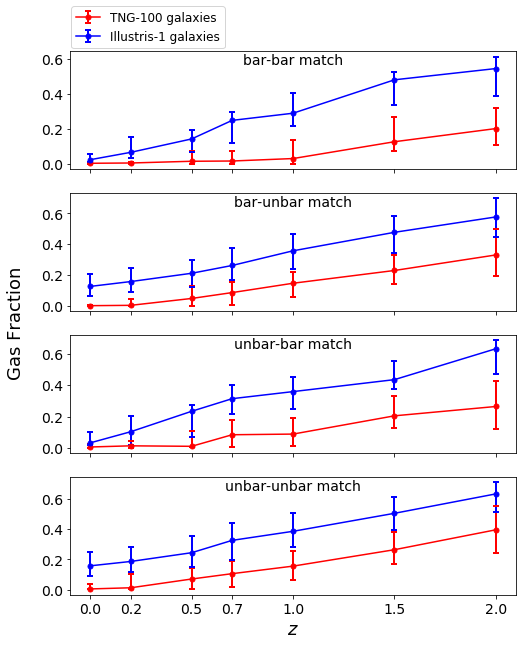

In [35]:
Match_GasFraction()

In [38]:
def Match_BHdot():
    fig, axs = plt.subplots(4, 1, sharex='col', sharey='row', figsize=(8,10))
    titles = ['bar-bar match', 'bar-unbar match', 'unbar-bar match', 'unbar-unbar match']
#     fig.suptitle('Matched galaxies BH dot')
#     axs[1].set_ylabel(r'Subhalo BHdot ($(10^{10} M_\odot/h) / (0.978Gyr/h)$)')
    for ax, data, tit in zip(axs, dolist, titles):
        #Global_il1-TNG_Gasfration
        il1_Y, il1_Err = Ydata('il1', [data[x] for x in data.keys()], il1_BHdot, il1_snap, rs)

        tng_Y, tng_Err = Ydata('TNG', [x for x in data.keys()], tng_BHdot, tng_snap, rs)

        ax.errorbar(rs, tng_Y, yerr=tng_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o',ms=5, ls='-', label='TNG-100 galaxies')
        ax.errorbar(rs, il1_Y, yerr=il1_Err, elinewidth=2, capthick=2, capsize=3, color='blue', fmt='o', ms=5, ls='-', label='Illustris-1 galaxies')
        
        ax.text(0.5, 0.98, tit, horizontalalignment='center', verticalalignment='top', transform=ax.transAxes, fontsize=14)
        
        ax.set_xticks(rs)
        ax.set_ylim(1e-7, 0.1)
        ax.set_yscale("log")
        
    axs[0].legend(loc = 1, bbox_to_anchor = (0.36, 1.43), fontsize=12)
    
    axs[1].text(-0.1, 2.3, r'$log_{10}(\dot{M}_{BH} / 10^{10} M_\odot / Gyr)$', fontsize=18, 
                horizontalalignment='right', verticalalignment='center',rotation='vertical', transform=ax.transAxes)
    axs[3].set_xlabel('$z$', fontsize=18)
    

    plt.savefig('f:/Linux/local_result/Match/match_BHdot_V20.pdf')

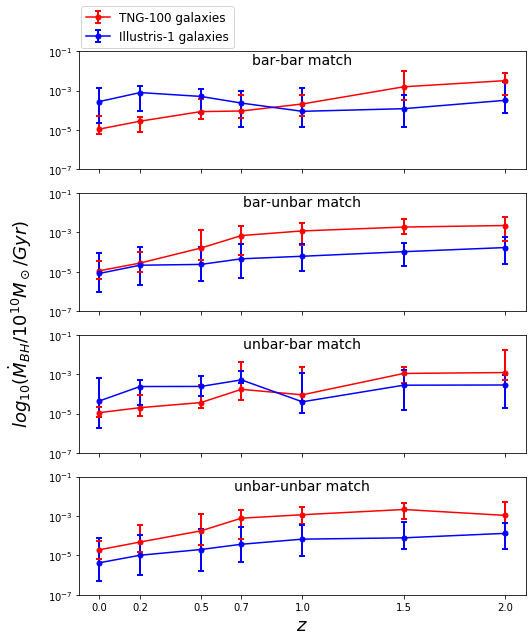

In [39]:
Match_BHdot()

In [40]:
def Match_BHmass():
    fig, axs = plt.subplots(4, 1, sharex='col', sharey='row', figsize=(8,10))
    titles = ['bar-bar match', 'bar-unbar match', 'unbar-bar match', 'unbar-unbar match']
#     fig.suptitle('Matched galaxies BH mass')
#     axs[1].set_ylabel(r'Subhalo BHmass $10^{10} M_\odot/h$')
    for ax, data, tit in zip(axs, dolist, titles):
        #Global_il1-TNG_Gasfration
        il1_Y, il1_Err = Ydata('il1', [data[x] for x in data.keys()], il1_BHMass, il1_snap, rs)

        tng_Y, tng_Err = Ydata('TNG', [x for x in data.keys()], tng_BHMass, tng_snap, rs)

        ax.errorbar(rs, tng_Y, yerr=tng_Err, elinewidth=2, capthick=2, capsize=3, color='r', fmt='o',ms=5, ls='-', label='TNG-100 galaxies')
        ax.errorbar(rs, il1_Y, yerr=il1_Err, elinewidth=2, capthick=2, capsize=3, color='blue', fmt='o', ms=5, ls='-', label='Illustris-1 galaxies')
        
        ax.text(0.5, 0.98, tit, horizontalalignment='center', verticalalignment='top', transform=ax.transAxes, fontsize=14)
        
        ax.set_xticks(rs)
        ax.set_ylim(5.5, 9)
#         ax.set_yscale("log")
        
        
    axs[0].legend(loc = 1, bbox_to_anchor = (0.36, 1.43), fontsize=12)
    
    axs[1].text(-0.1, 2.3, r'$log_{10}(M_{BH} / M_\odot)$', fontsize=18, 
                horizontalalignment='right', verticalalignment='center',rotation='vertical', transform=ax.transAxes)
    axs[3].set_xlabel('$z$', fontsize=18)

    plt.savefig('f:/Linux/local_result/Match/match_BHmass_V20.pdf')

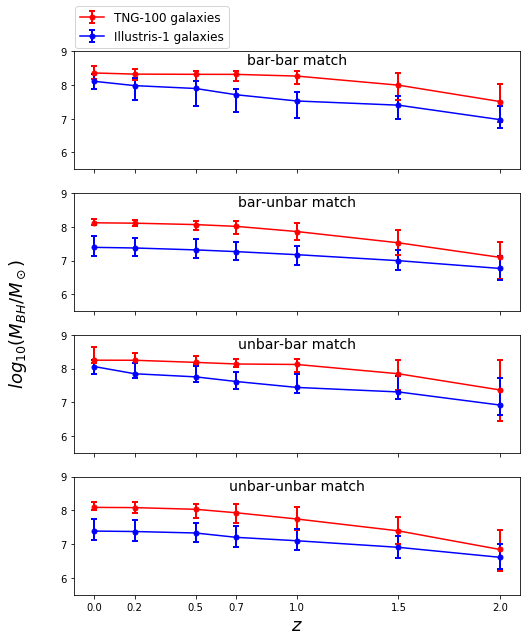

In [41]:
Match_BHmass()